# ML1

## Intro

   1. To get started, please write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples? 
   2. Use the classification of tasks in the introduction to decide which class you can assign to the tasks from the table above and to the 5 examples you provided. 
   3. Think about what the difference is between multiclass and multilabel.
   4. Is an example case with house prices from the theory a classification of a regression problem? Is it possible to reduce the regression problem to classification?

1)Медицинская диагностика <br>
2)Финансы и борьба с мошенничеством <br>
3)Персонализированные рекомендации <br>
4)Автономные транспортные средства <br>
5)Обработка естественного языка (NLP) <br>

| Задача                             | Тип задачи                          | Категория ML                  |
|------------------------------------|-------------------------------------|-------------------------------|
| Медицинская диагностика           | Классификация/Регрессия             | Supervised Learning           |
| Финансы и борьба с мошенничеством  | Классификация/Обнаружение аномалий  | Supervised/Unsupervised       |
| Персонализированные рекомендации   | Рекомендательные системы            | Hybrid (Supervised/Unsupervised) |
| Автономные транспортные средства   | Классификация + Reinforcement       | Supervised + Reinforcement    |
| NLP                                | Классификация/Генерация             | Supervised/Unsupervised       |


| # | Task T                          | Тип задачи ML                   |
|---|---------------------------------|----------------------------------|
| 1 | Predict house price             | Supervised Learning (Регрессия) |
| 2 | Predict loan repayment          | Supervised Learning (Классификация) |
| 3 | Predict medicine timing         | Supervised Learning              |
| 4 | Choose medicine                 | Supervised Learning (Мультикласс) |
| 5 | Client segmentation for promo   | Unsupervised Learning (Кластеризация) или Reinforcement Learning |
| 6 | Defect recognition              | Supervised Learning (CV-классификация) |
| 7 | Shelf product placement         | Reinforcement Learning           |
| 8 | Search engine ranking           | Supervised Learning (Ranking)    |
| 9 | Customer segmentation           | Unsupervised Learning            |
| 10| Traffic anomaly detection       | Unsupervised Learning (Anomaly Detection) |


Мультикласс - необходимо выбрать один класс из нескольких <br>
Мультилейбел - необходимо назначить энное количество "тегов"

Вообще это задача регресии, однако если мы перейдем от предсказания цен к предсказанию интервалов цен, то задача станет задачей классификации

## Introduction to Data Analysis

Import the libraries pandas, numpy, sklearn, lightgbm, scipy, statsmodels, matplotlib, seaborn. Use pip install if necessary.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import lightgbm as lgbm
import scipy
import statsmodels
import matplotlib
import seaborn

Load data from kaggle using pandas. You only need the table data, which is in train.json.

In [2]:
dataframe = pd.read_json("../datasets/train.json")
dataframe

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


What is the size (the number of rows and columns) of your data?

49 352 rows x 15 cols

Print the list of columns. Which column is a target?

In [3]:
dataframe.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

target column is 'interest_level'

Make a quick analysis of the data: use the methods info(), describe(), corr(). Explain the results of the outputs. Are there any empty columns?

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [5]:
dataframe.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
dataframe.select_dtypes(include='number').corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


We'll work with only 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with the target column 'price'. Create a dataframe with only these columns.

In [7]:
df = dataframe[['bathrooms', 'bedrooms', 'interest_level', 'price']].copy()
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


## Statistical Data Analysis

3. Target analysis
   1. Plot a histogram to understand the distribution of the target. Is it all clear? 
   2. The next step is boxplot(). What can you say about the target? Are there any outliers? 
   3. Drop the rows that are outside the 1 and 99 percentiles from the target column. 
   4. Plot another histogram for price. Explain the result.

In [8]:
df['price'].min()

np.int64(43)

In [9]:
df['price'].max()

np.int64(4490000)

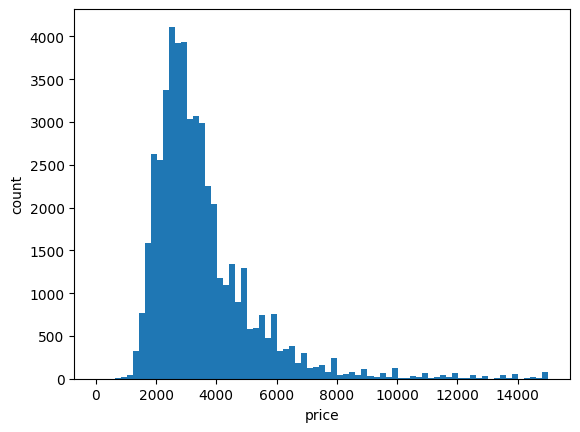

In [10]:
matplotlib.pyplot.xlabel('price')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.hist(df['price'], bins=75 ,range = (40, 15000));

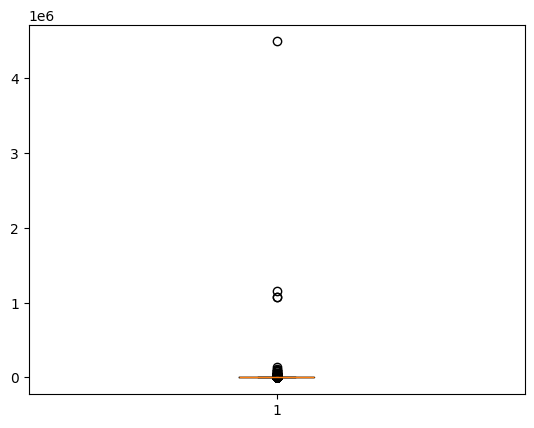

In [11]:
matplotlib.pyplot.boxplot(df['price']);

In [12]:
q = list(df['price'].quantile([0.01, 0.99]))
df = df[(df['price'] < q[1])&(df['price'] > q[0])].copy()

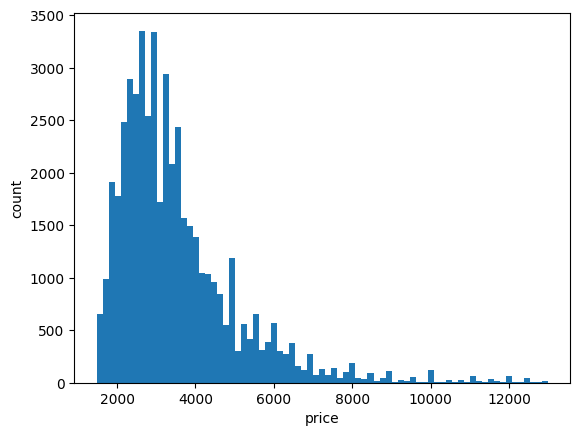

In [13]:
matplotlib.pyplot.xlabel('price')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.hist(df['price'], bins=75);

4. Characteristics Analysis
    1. What is the type of column 'interest_level'? 
    2. Print the values in this column. How many entries does each value contain? 
    3. Encode these values. For example, you can replace each value with 0, 1, or 2.
    4. Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?

In [14]:
df['interest_level'].dtype

dtype('O')

In [15]:
df['interest_level'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [16]:
df['interest_level'] = df['interest_level'].map({'low':0, 'medium':1, 'high':2})

10.0


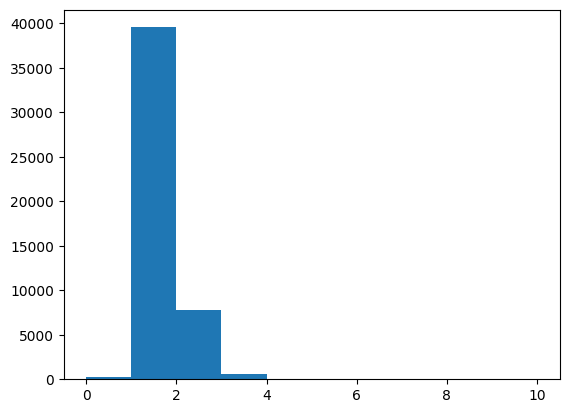

In [17]:
matplotlib.pyplot.hist(df['bathrooms'])
print(df['bathrooms'].max())

8


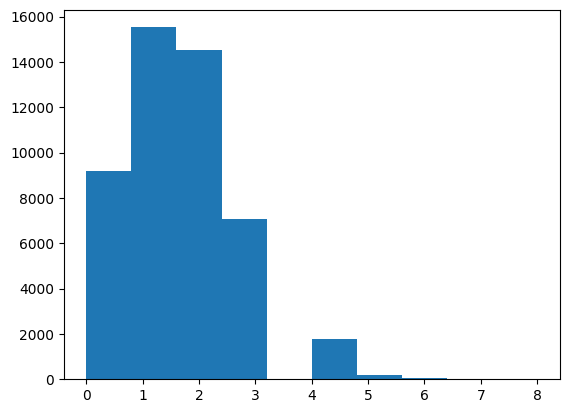

In [18]:
matplotlib.pyplot.hist(df['bedrooms'])
print(df['bedrooms'].max())

5. Complex analysis
    1. Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation? 
    2. Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.

In [19]:
df.corr()

,bathrooms,bedrooms,interest_level,price
bathrooms,1.000000,0.517200,-0.062819,0.670808
bedrooms,0.517200,1.000000,0.051282,0.547310
interest_level,-0.062819,0.051282,1.000000,-0.199652
price,0.670808,0.547310,-0.199652,1.000000


<Axes: >

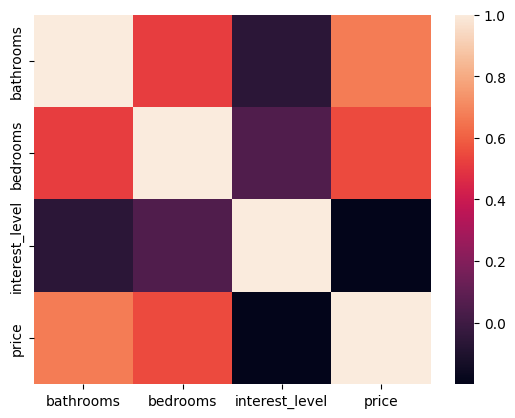

In [20]:
seaborn.heatmap(df.corr())

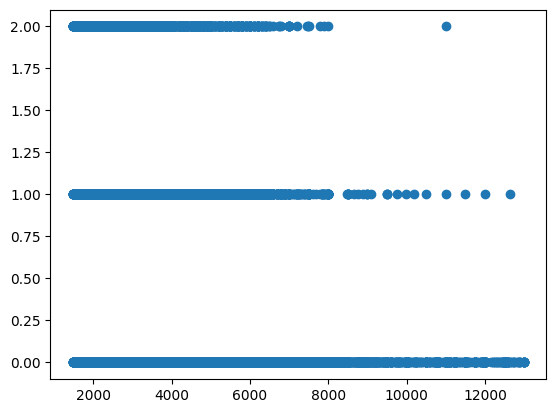

In [21]:
matplotlib.pyplot.scatter(x=df['price'], y=df['interest_level']);

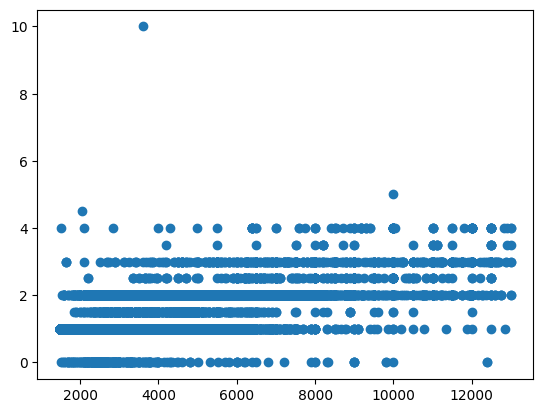

In [22]:
matplotlib.pyplot.scatter(x=df['price'], y=df['bathrooms']);

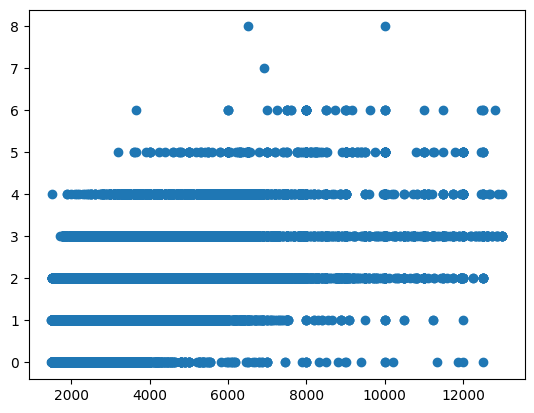

In [23]:
matplotlib.pyplot.scatter(x=df['price'], y=df['bedrooms']);

## Creating Features

This step is very broad. You can create as many features as you want. For example, you can add 3 new features that are squared: 'bathrooms_squared', 'bedrooms_squared', ''interest_level_squared'. Plot a correlation matrix with the new features. Are the new features more correlated with the target than the basic features?

In [24]:
df['bathrooms_squared'] = df['bathrooms']**2
df['bedrooms_squared'] = df['bedrooms']**2
df['interest_level_squared'] = df['interest_level']**2
df

,bathrooms,bedrooms,interest_level,price,bathrooms_squared,bedrooms_squared,interest_level_squared
4,1.0,1,1,2400,1.00,1,1
6,1.0,2,0,3800,1.00,4,0
9,1.0,2,1,3495,1.00,4,1
10,1.5,3,1,3000,2.25,9,1
15,1.0,0,0,2795,1.00,0,0
...,...,...,...,...,...,...,...
124000,1.0,3,0,2800,1.00,9,0
124002,1.0,2,1,2395,1.00,4,1
124004,1.0,1,1,1850,1.00,1,1
124008,1.0,2,1,4195,1.00,4,1


In [25]:
df.corr()['price']

bathrooms                 0.670808
bedrooms                  0.547310
interest_level           -0.199652
price                     1.000000
bathrooms_squared         0.646949
bedrooms_squared          0.544612
interest_level_squared   -0.182283
Name: price, dtype: float64

To train the model here, we will not use your new features. Remember this example and use it in Lecture 2. To train the model, we will only consider the features 'bathrooms' and 'bedrooms'.

In [26]:
train_df = df[['bathrooms', 'bedrooms', 'price']].copy()

To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data.

In [27]:
test_df = pd.read_json("../datasets/test.json")[['bathrooms', 'bedrooms', 'price']]

Initialize PolynomialFeatures() with a degree of 10.

In [28]:
poly = sklearn.preprocessing.PolynomialFeatures(10)

Apply PolynomialFeatures() to fit and transform your training and test data.

In [29]:
pd.DataFrame(poly.fit_transform(train_df))

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
0,1.0,1.0,1.0,2400.0,1.00,1.0,2400.0,1.0,2400.0,5760000.0,...,2400.0,5.760000e+06,1.382400e+10,3.317760e+13,7.962624e+16,1.911030e+20,4.586471e+23,1.100753e+27,2.641808e+30,6.340338e+33
1,1.0,1.0,2.0,3800.0,1.00,2.0,3800.0,4.0,7600.0,14440000.0,...,1945600.0,3.696640e+09,7.023616e+12,1.334487e+16,2.535525e+19,4.817498e+22,9.153247e+25,1.739117e+29,3.304322e+32,6.278212e+35
2,1.0,1.0,2.0,3495.0,1.00,2.0,3495.0,4.0,6990.0,12215025.0,...,1789440.0,3.127046e+09,5.464514e+12,9.549237e+15,1.668729e+19,2.916104e+22,5.095892e+25,8.905072e+28,1.556161e+32,2.719392e+35
3,1.0,1.5,3.0,3000.0,2.25,4.5,4500.0,9.0,9000.0,9000000.0,...,59049000.0,5.904900e+10,5.904900e+13,5.904900e+16,5.904900e+19,5.904900e+22,5.904900e+25,5.904900e+28,5.904900e+31,5.904900e+34
4,1.0,1.0,0.0,2795.0,1.00,0.0,2795.0,0.0,0.0,7812025.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.909498e+34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48338,1.0,1.0,3.0,2800.0,1.00,3.0,2800.0,9.0,8400.0,7840000.0,...,55112400.0,5.143824e+10,4.800902e+13,4.480842e+16,4.182119e+19,3.903311e+22,3.643091e+25,3.400218e+28,3.173537e+31,2.961968e+34
48339,1.0,1.0,2.0,2395.0,1.00,2.0,2395.0,4.0,4790.0,5736025.0,...,1226240.0,1.468422e+09,1.758436e+12,2.105727e+15,2.521608e+18,3.019626e+21,3.616002e+24,4.330162e+27,5.185369e+30,6.209479e+33
48340,1.0,1.0,1.0,1850.0,1.00,1.0,1850.0,1.0,1850.0,3422500.0,...,1850.0,3.422500e+06,6.331625e+09,1.171351e+13,2.166999e+16,4.008948e+19,7.416553e+22,1.372062e+26,2.538315e+29,4.695883e+32
48341,1.0,1.0,2.0,4195.0,1.00,2.0,4195.0,4.0,8390.0,17598025.0,...,2147840.0,4.505094e+09,9.449436e+12,1.982019e+16,4.157285e+19,8.719905e+22,1.829000e+26,3.836328e+29,8.046698e+32,1.687795e+36


In [30]:
pd.DataFrame(poly.fit_transform(test_df))

,0,1,2,3,4,5,6,7,8,9,...,276,277,278,279,280,281,282,283,284,285
0,1.0,1.0,1.0,2950.0,1.0,1.0,2950.0,1.0,2950.0,8702500.0,...,2950.0,8.702500e+06,2.567238e+10,7.573351e+13,2.234138e+17,6.590708e+20,1.944259e+24,5.735564e+27,1.691991e+31,4.991375e+34
1,1.0,1.0,2.0,2850.0,1.0,2.0,2850.0,4.0,5700.0,8122500.0,...,1459200.0,2.079360e+09,2.963088e+12,4.222400e+15,6.016921e+18,8.574112e+21,1.221811e+25,1.741081e+28,2.481040e+31,3.535482e+34
2,1.0,1.0,0.0,2295.0,1.0,0.0,2295.0,0.0,0.0,5267025.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.053469e+33
3,1.0,1.0,2.0,2900.0,1.0,2.0,2900.0,4.0,5800.0,8410000.0,...,1484800.0,2.152960e+09,3.121792e+12,4.526598e+15,6.563568e+18,9.517173e+21,1.379990e+25,2.000986e+28,2.901429e+31,4.207072e+34
4,1.0,1.0,1.0,3254.0,1.0,1.0,3254.0,1.0,3254.0,10588516.0,...,3254.0,1.058852e+07,3.445503e+10,1.121167e+14,3.648276e+17,1.187149e+21,3.862983e+24,1.257015e+28,4.090326e+31,1.330992e+35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,1.0,1.0,1.0,1700.0,1.0,1.0,1700.0,1.0,1700.0,2890000.0,...,1700.0,2.890000e+06,4.913000e+09,8.352100e+12,1.419857e+16,2.413757e+19,4.103387e+22,6.975757e+25,1.185879e+29,2.015994e+32
74655,1.0,1.0,2.0,4195.0,1.0,2.0,4195.0,4.0,8390.0,17598025.0,...,2147840.0,4.505094e+09,9.449436e+12,1.982019e+16,4.157285e+19,8.719905e+22,1.829000e+26,3.836328e+29,8.046698e+32,1.687795e+36
74656,1.0,1.0,0.0,2400.0,1.0,0.0,2400.0,0.0,0.0,5760000.0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.340338e+33
74657,1.0,2.0,2.0,6895.0,4.0,4.0,13790.0,4.0,13790.0,47541025.0,...,3530240.0,1.217050e+10,4.195781e+13,1.446495e+17,4.986793e+20,1.719197e+24,5.926931e+27,2.043310e+31,7.044310e+34,2.428526e+38


## Now you need to train 3 models: linear regression, decision tree and naive model. We will use them as black boxes without deep understanding. 

1. Results table 
   1. Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.

In [31]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [32]:
result_MAE

,model,train,test


In [33]:
result_RMSE

,model,train,test


   2. Linear Regression 
      1. Initialize linear regression from **sklearn** with no parameters. 
      2. Fit your model and make predictions on training and test features. Save it as new columns in data.
      3. Compute MAE (Mean Absolute Error) on training and test targets.
      4. Calculate RMSE (Root Mean Square Error) on training and test objectives.
      5. Insert your metrics into tables *result_MAE* and *result_RMSE* with model name 'linear_regression'.

In [34]:
LinReg_model = sklearn.linear_model.LinearRegression()
LinReg_model.fit(train_df[['bathrooms', 'bedrooms']], train_df['price'])

LinearRegression()

In [35]:
train_df['result'] = LinReg_model.predict(train_df[['bathrooms', 'bedrooms']])
test_df['result'] = LinReg_model.predict(test_df[['bathrooms', 'bedrooms']])

In [36]:
train_df

,bathrooms,bedrooms,price,result
4,1.0,1,2400,2966.146835
6,1.0,2,3800,3359.984863
9,1.0,2,3495,3359.984863
10,1.5,3,3000,4675.038910
15,1.0,0,2795,2572.308807
...,...,...,...,...
124000,1.0,3,2800,3753.822891
124002,1.0,2,2395,3359.984863
124004,1.0,1,1850,2966.146835
124008,1.0,2,4195,3359.984863


In [37]:
test_df

,bathrooms,bedrooms,price,result
0,1.0,1,2950,2966.146835
1,1.0,2,2850,3359.984863
2,1.0,0,2295,2572.308807
3,1.0,2,2900,3359.984863
5,1.0,1,3254,2966.146835
...,...,...,...,...
124003,1.0,1,1700,2966.146835
124005,1.0,2,4195,3359.984863
124006,1.0,0,2400,2572.308807
124007,2.0,2,6895,5202.416902


In [38]:
test_MAE = sklearn.metrics.mean_absolute_error(y_true=test_df['price'], y_pred=test_df['result'])
train_MAE = sklearn.metrics.mean_absolute_error(y_true=train_df['price'], y_pred=train_df['result'])
test_RMSE = sklearn.metrics.root_mean_squared_error(y_true=test_df['price'], y_pred=test_df['result'])
train_RMSE = sklearn.metrics.root_mean_squared_error(y_true=train_df['price'], y_pred=train_df['result'])

result_MAE.loc[len(result_MAE)] = {'model':'linear_regression', 'train':train_MAE, 'test':test_MAE}
result_RMSE.loc[len(result_MAE)] = {'model':'linear_regressiom', 'train':train_RMSE, 'test':test_RMSE}

   3. Decision Tree
      1. Initialize decision tree regressor from sklearn with fixed random_state=21.
      2. Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data. 
      3. Compute MAE (Mean Absolute Error) on train and test targets.
      4. Compute RMSE (Root Mean Square Error) on train and test targets.
      5. Insert your metrics into tables *result_MAE* and *result_RMSE* with model name 'decision_tree'.

In [39]:
TreeReg_model = sklearn.tree.DecisionTreeRegressor(random_state=21)
TreeReg_model.fit(train_df[['bathrooms', 'bedrooms']], train_df['price'])

DecisionTreeRegressor(random_state=21)

In [40]:
train_df['result'] = TreeReg_model.predict(train_df[['bathrooms', 'bedrooms']])
test_df['result'] = TreeReg_model.predict(test_df[['bathrooms', 'bedrooms']])

In [41]:
test_MAE = sklearn.metrics.mean_absolute_error(y_true=test_df['price'], y_pred=test_df['result'])
train_MAE = sklearn.metrics.mean_absolute_error(y_true=train_df['price'], y_pred=train_df['result'])
test_RMSE = sklearn.metrics.root_mean_squared_error(y_true=test_df['price'], y_pred=test_df['result'])
train_RMSE = sklearn.metrics.root_mean_squared_error(y_true=train_df['price'], y_pred=train_df['result'])

result_MAE.loc[len(result_MAE)] = {'model':'decision_tree', 'train':train_MAE, 'test':test_MAE}
result_RMSE.loc[len(result_MAE)] = {'model':'decision_tree', 'train':train_RMSE, 'test':test_RMSE}

   4. Naive Models
      1. Calculate the mean and median of 'price' on the training and test data and create a column with these values. 
      2. Calculate the MAE on the training and test targets between your target and the calculated mean and median. 
      3. Calculate the RMSE on the training and test targets between your target and the calculated mean and median. 
      4. Insert your metrics into tables result_MAE and result_RMSE with model names 'naive_mean' and 'naive_median'.

In [42]:
train_df['mean'] = train_df['price'].mean()
train_df['median'] = train_df['price'].median()
test_df['mean'] = test_df['price'].mean()
test_df['median'] = test_df['price'].median()

In [43]:
test_MAE = sklearn.metrics.mean_absolute_error(y_true=test_df['price'], y_pred=test_df['mean'])
train_MAE = sklearn.metrics.mean_absolute_error(y_true=train_df['price'], y_pred=train_df['mean'])
test_RMSE = sklearn.metrics.root_mean_squared_error(y_true=test_df['price'], y_pred=test_df['mean'])
train_RMSE = sklearn.metrics.root_mean_squared_error(y_true=train_df['price'], y_pred=train_df['mean'])

result_MAE.loc[len(result_MAE)] = {'model':'naive_mean', 'train':train_MAE, 'test':test_MAE}
result_RMSE.loc[len(result_MAE)] = {'model':'naive_mean', 'train':train_RMSE, 'test':test_RMSE}

In [44]:
test_MAE = sklearn.metrics.mean_absolute_error(y_true=test_df['price'], y_pred=test_df['median'])
train_MAE = sklearn.metrics.mean_absolute_error(y_true=train_df['price'], y_pred=train_df['median'])
test_RMSE = sklearn.metrics.root_mean_squared_error(y_true=test_df['price'], y_pred=test_df['median'])
train_RMSE = sklearn.metrics.root_mean_squared_error(y_true=train_df['price'], y_pred=train_df['median'])

result_MAE.loc[len(result_MAE)] = {'model':'naive_median', 'train':train_MAE, 'test':test_MAE}
result_RMSE.loc[len(result_MAE)] = {'model':'naive_median', 'train':train_RMSE, 'test':test_RMSE}

   5. Compare the results 
      1. Print your final result_MAE and result_RMSE tables. 
      2. Which is the best model?

In [45]:
result_MAE

,model,train,test
0,linear_regression,781.550473,986.032459
1,decision_tree,753.675997,953.931113
2,naive_mean,1134.361473,1440.961299
3,naive_median,1082.220859,1322.640673


In [47]:
result_RMSE

,model,train,test
1,linear_regressiom,1115.809281,9624.835034
2,decision_tree,1070.598967,9589.615632
3,naive_mean,1585.609099,9713.026562
4,naive_median,1631.719953,9731.481148


best model is decision tree